# Import libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# File uploading

In [2]:
df=pd.read_csv(r"C:\Users\tushar\Downloads\project eda\ml\diabetes (1).csv")

## About Dataset

The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative).
The data includes features such as age,body mass index (BMI), glucose, insulin, and blood pressure.
This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information.

### Problem statement 


The goal is to create a reliable predictive tool that can assist healthcare professionals in identifying individuals at high risk of developing diabetes, enabling early intervention and treatment plans.
O indicates patient have diabetes
1 indicates patient doesn't have diabetes

### Data Pre-processing

In [3]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,500,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,102,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


Dataset has 768 rows and 9 columns 
dataset contain women pregnancies who as diabetes or not 
Glucose - Pregnent women level of glucose after tests 
Bloodpressure - blood pressure of the person 
DiabetesPedigreeFunction - level of the person
Outcome - person has diabetes or not

In [5]:
df.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.7  0.735                     67   0          1
             67       76             0              0        45.3  0.194                     46   0          1
5            103      108            37             0        39.2  0.305                     65   0          1
             104      74             0              0        28.8  0.153                     48   0          1
             105      72             29             325      36.9  0.159                     28   0          1
                                                                                                            ..
2            84       50             23             76       30.4  0.968                     21   0          1
             85       65             0              0        39.6  0.930                     27   0          1
      

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,122.242188,69.662760,20.536458,79.799479,31.992578,0.471876,33.308594,0.348958
std,3.369578,49.001676,24.827374,15.952218,115.244002,7.884160,0.331329,11.998145,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,1150.000000,500.000000,99.000000,846.000000,67.100000,2.420000,102.000000,1.000000


In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.shape

(768, 9)

In [11]:
df.size

6912

In [12]:
df.ndim

2

In [13]:
df.mean()

Pregnancies                   3.845052
Glucose                     122.242188
BloodPressure                69.662760
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.308594
Outcome                       0.348958
dtype: float64

In [14]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<AxesSubplot:xlabel='Outcome', ylabel='count'>

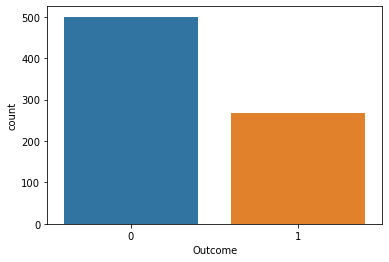

In [15]:
sns.countplot(df['Outcome']) # target columns having imbalanced values..

# Define x & y

In [16]:
x=df.iloc[:,:-1]
y=df['Outcome']

In [17]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,500,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,102
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [18]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [19]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import recall_score,precision_score,f1_score


# Splitting data to train n test

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=30)

In [21]:
x_train.shape

(576, 8)

In [22]:
y_test.shape

(192,)

# Model building and training

In [23]:
log_model=LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

# Testing Model Evaluation

In [24]:
y_predtest = log_model.predict(x_test)

# Testing data

In [25]:

Accuracy = accuracy_score(y_test,y_predtest)
print('Accuracy:',Accuracy)

Confusion_matrix = confusion_matrix(y_test,y_predtest)
print('Confusion_matrix: \n',Confusion_matrix)

Classification_report = classification_report(y_test,y_predtest)
print('Classification_report: \n',Classification_report)


Accuracy: 0.765625
Confusion_matrix: 
 [[114  16]
 [ 29  33]]
Classification_report: 
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       130
           1       0.67      0.53      0.59        62

    accuracy                           0.77       192
   macro avg       0.74      0.70      0.71       192
weighted avg       0.76      0.77      0.76       192



In [26]:
Precision = precision_score(y_test,y_predtest)
print('Precision:',Precision)

F1_score = f1_score(y_test,y_predtest)
print('F1_score:',F1_score)

Precision: 0.673469387755102
F1_score: 0.5945945945945945


In [27]:
Recall = recall_score(y_test,y_predtest)
print('Recall:',Recall)

Recall: 0.532258064516129


In [28]:
TP = 33
FP = 16
FN = 29 
TN = 114


In [29]:
Accuracy = (TP+TN)/(TP+TN+FP+FN)
Accuracy

0.765625

In [30]:
Recall = TP/(TP+FN)
Recall

0.532258064516129

# Training data

In [31]:
y_predtrain = log_model.predict(x_train)

Accuracy = accuracy_score(y_train,y_predtrain)
print('Accuracy:',Accuracy)

Confusion_matrix = confusion_matrix(y_train,y_predtrain)
print('Confusion_matrix: \n',Confusion_matrix)

Classification_report = classification_report(y_train,y_predtrain)
print('Classification_report: \n',Classification_report)


Accuracy: 0.7638888888888888
Confusion_matrix: 
 [[328  42]
 [ 94 112]]
Classification_report: 
               precision    recall  f1-score   support

           0       0.78      0.89      0.83       370
           1       0.73      0.54      0.62       206

    accuracy                           0.76       576
   macro avg       0.75      0.72      0.73       576
weighted avg       0.76      0.76      0.75       576



In [32]:
TP = 111
FP = 41
FN = 95
TN = 329


In [33]:
Recall = TP/(TP+FN)
Recall

0.5388349514563107

In [34]:
Accuracy = (TP+TN)/(TP+TN+FP+FN)
Accuracy

0.7638888888888888

In [35]:

Precision = precision_score(y_train,y_predtrain)
print('Precision:',Precision)

F1_score = f1_score(y_train,y_predtrain)
print('F1_score:',F1_score)

Precision: 0.7272727272727273
F1_score: 0.6222222222222222


The model achieved an accuracy of 76% on the testing set, with precision,and F1 score of 0.72,and 0.62, respectively.
The feature analysis revealed that age, BMI, and glucose levels were the most influential factors in predicting diabetes onset.
The deployed tool provided healthcare professionals with an efficient means to assess patients'
diabetes risk and intervene early, potentially improving patient outcomes and reducing the prevalence of diabetes-related complications.

# Robust Model